In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import os
import gzip
import glob
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from time import time


In [32]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten,BatchNormalization,Dropout
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import TensorBoard
import keras.backend as K
from keras import backend as K

Using TensorFlow backend.


In [3]:
tf.__version__

'1.12.0'

In [4]:
num_classes = 96
img_size_flat = 28*28*3
img_shape_full = (28,28,3)
TotalSize = 96000

In [5]:
x = []
y_class = []
p = 0
for i in glob.glob("classes1/*"):
    for j in glob.glob(i+'/*.jpeg'):
        im = cv2.imread(j)
        resize_img = cv2.resize(im  , (28 , 28))
        x.append(resize_img)
        temp = []
        temp.append(os.path.basename(i))
        temp.append(p)
        y_class.append(temp)
    p+=1
x = np.array(x)
y_class = np.array(y_class)

In [6]:
x_train, x_test, y_train_cls, y_test_cls = train_test_split(x, y_class, test_size=0.40, random_state=42)
train_size = y_train_cls.shape[0]
test_size = y_test_cls.shape[0]
print(train_size,test_size)

57600 38400


In [7]:
b = np.zeros((train_size, num_classes))
b[np.arange(train_size), y_train_cls[:,1].astype(int)] = 1
y_train = b

In [8]:
b = np.zeros((test_size, num_classes))
b[np.arange(test_size), y_test_cls[:,1].astype(int)] = 1
y_test = b

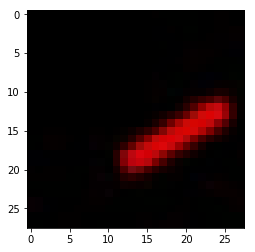

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
imgplot = plt.imshow(x_train[3])
plt.show()
print(y_train[3])

In [10]:
def Def_Model1():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))
    
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model2():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=7, strides=1, filters=16,
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model3():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    #model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv2'))

    model.add(BatchNormalization())


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model4():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv2'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=7, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    model.add(Conv2D(kernel_size=7, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
   
   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model5():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
 

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model6():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                     activation='relu', name='layer_conv4'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model7():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,3,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=128, padding='valid',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='valid',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=64, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [11]:
model1 = Def_Model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        2432      
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 28, 28, 32)        9248      
_________________________________________________________________
layer_conv4 (Conv2D)         (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
__________

In [12]:
optimizer = Adam(lr=1e-3)
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model1line/{}'.format(time()))
model1.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 26s 451us/step - loss: 1.2985 - acc: 0.6910 - val_loss: 0.3740 - val_acc: 0.8839
Epoch 2/3
57600/57600 [==============================] - 25s 435us/step - loss: 0.1119 - acc: 0.9656 - val_loss: 0.1111 - val_acc: 0.9655
Epoch 3/3
57600/57600 [==============================] - 25s 436us/step - loss: 0.0906 - acc: 0.9751 - val_loss: 0.1551 - val_acc: 0.9539


In [13]:
result = model1.evaluate(x=x_test,y=y_test)
for name, value in zip(model1.metrics_names, result):
    print(name, value)
model1.save("Task12_line1.h5")

38400/38400 [==============================] - 5s 137us/step
loss 0.1551327172468882
acc 0.9538802083333333


In [14]:
model2 = Def_Model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 22, 22, 16)        2368      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1983488   
_________________________________________________________________
dense_3 (Dense)              (None, 96)                98400     
Total params: 2,084,320
Trainable params: 2,084,288
Non-trainable params: 32
_________________________________________________________________

In [15]:
optimizer = Adam(lr=1e-3)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model2line/{}'.format(time()))
model2.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 8s 132us/step - loss: 1.2989 - acc: 0.6456 - val_loss: 0.3583 - val_acc: 0.8669
Epoch 2/3
57600/57600 [==============================] - 7s 127us/step - loss: 0.1637 - acc: 0.9440 - val_loss: 0.1246 - val_acc: 0.9548
Epoch 3/3
57600/57600 [==============================] - 8s 140us/step - loss: 0.0908 - acc: 0.9703 - val_loss: 0.1051 - val_acc: 0.9661


In [16]:
result = model2.evaluate(x=x_test,y=y_test)
for name, value in zip(model2.metrics_names, result):
    print(name, value)
model2.save("Task12_line2.h5")

38400/38400 [==============================] - 2s 46us/step
loss 0.10507126471512795
acc 0.9661197916666666


In [11]:
model3 = Def_Model3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              13108224  
_________________________________________________________________
dense_1 (Dense)              (None, 96)                98400     
Total para

In [12]:
optimizer = Adam(lr=1e-3)
model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model3line/{}'.format(time()))
model3.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 30s 516us/step - loss: 2.0063 - acc: 0.6508 - val_loss: 0.3616 - val_acc: 0.9158
Epoch 2/3
57600/57600 [==============================] - 28s 485us/step - loss: 0.3884 - acc: 0.9242 - val_loss: 0.5225 - val_acc: 0.8898
Epoch 3/3
57600/57600 [==============================] - 28s 480us/step - loss: 0.3010 - acc: 0.9514 - val_loss: 0.2604 - val_acc: 0.9588


In [13]:
result = model3.evaluate(x=x_test,y=y_test)
for name, value in zip(model3.metrics_names, result):
    print(name, value)
model3.save("Task12_line3.h5")

38400/38400 [==============================] - 5s 129us/step
loss 0.26036784167789545
acc 0.9587760416666666


In [20]:
model4 = Def_Model4()
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 7, 7, 32)          50208     
__________

In [21]:
optimizer = Adam(lr=1e-3)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model4line/{}'.format(time()))
model4.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 14s 240us/step - loss: 0.6133 - acc: 0.8295 - val_loss: 0.0820 - val_acc: 0.9713
Epoch 2/3
57600/57600 [==============================] - 13s 225us/step - loss: 0.0406 - acc: 0.9884 - val_loss: 0.0160 - val_acc: 0.9952
Epoch 3/3
57600/57600 [==============================] - 13s 228us/step - loss: 0.0377 - acc: 0.9876 - val_loss: 0.0851 - val_acc: 0.9755


In [22]:
result = model4.evaluate(x=x_test,y=y_test)
for name, value in zip(model4.metrics_names, result):
    print(name, value)
model4.save("Task12_line4.h5")

38400/38400 [==============================] - 4s 91us/step
loss 0.08513712100522146
acc 0.9754947916666666


In [25]:
model5 = Def_Model5()
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        2432      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 28, 28, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [26]:
optimizer = Adam(lr=1e-3)
model5.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model5line/{}'.format(time()))
model5.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 26s 443us/step - loss: 0.9788 - acc: 0.7114 - val_loss: 1.8732 - val_acc: 0.4359
Epoch 2/3
57600/57600 [==============================] - 25s 436us/step - loss: 0.1037 - acc: 0.9651 - val_loss: 1.2285 - val_acc: 0.6473
Epoch 3/3
57600/57600 [==============================] - 26s 447us/step - loss: 0.0607 - acc: 0.9798 - val_loss: 1.0814 - val_acc: 0.7184


In [27]:
result = model5.evaluate(x=x_test,y=y_test)
for name, value in zip(model5.metrics_names, result):
    print(name, value)
model5.save("Task12_line5.h5")

38400/38400 [==============================] - 5s 125us/step
loss 1.081372225607435
acc 0.7184114583333333


In [28]:
model6 = Def_Model6()
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 32)        2432      
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 22, 22, 32)        25632     
__________

In [29]:
optimizer = Adam(lr=1e-3)
model6.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model6line/{}'.format(time()))
model6.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 71s 1ms/step - loss: 1.2924 - acc: 0.6273 - val_loss: 0.4313 - val_acc: 0.8542
Epoch 2/3
57600/57600 [==============================] - 68s 1ms/step - loss: 0.2652 - acc: 0.9073 - val_loss: 0.2182 - val_acc: 0.9248
Epoch 3/3
57600/57600 [==============================] - 69s 1ms/step - loss: 0.2123 - acc: 0.9322 - val_loss: 0.2132 - val_acc: 0.9285


In [30]:
result = model6.evaluate(x=x_test,y=y_test)
for name, value in zip(model6.metrics_names, result):
    print(name, value)
model6.save("Task12_line6.h5")

38400/38400 [==============================] - 10s 253us/step
loss 0.21324227306390336
acc 0.928515625


In [31]:
model7 = Def_Model7()
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 128)       9728      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 22, 22, 128)       147584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 22, 22, 64)        204864    
__________

In [32]:
optimizer = Adam(lr=1e-3)
model7.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model7line/{}'.format(time()))
model7.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 57600 samples, validate on 38400 samples
Epoch 1/3
57600/57600 [==============================] - 94s 2ms/step - loss: 1.1558 - acc: 0.6605 - val_loss: 1.7994 - val_acc: 0.6307
Epoch 2/3
57600/57600 [==============================] - 91s 2ms/step - loss: 0.2044 - acc: 0.9299 - val_loss: 0.1693 - val_acc: 0.9454
Epoch 3/3
57600/57600 [==============================] - 93s 2ms/step - loss: 0.1657 - acc: 0.9484 - val_loss: 0.8836 - val_acc: 0.7898


In [33]:
result = model7.evaluate(x=x_test,y=y_test)
for name, value in zip(model7.metrics_names, result):
    print(name, value)
model7.save("Task12_line1.h5")

38400/38400 [==============================] - 16s 415us/step
loss 0.883619467181464
acc 0.789765625


In [34]:
def print_confusion_matrix(cm):
    recall=[]
    precision=[]
    recall_val = 0
    for i in range(len(cm)):
        num = cm[i][i]
        row_sum=cm[i].sum()
        recall_val = (1.0*num/row_sum)
        recall.append(recall_val);
        precision_val = (1.0*cm[i][i]/cm[:,i].sum())
        precision.append(precision_val)
    f = []
    f.append(np.array(recall))
    f.append(np.array(precision))
    f_score=[]
    for i in range(len(recall)):
        val = 2.0 * recall[i] * precision[i]
        val /= (precision[i]+recall[i])
        f_score.append(val)
    f.append(np.array(f_score))
    print(np.array(f))
    plt.figure(figsize=(40,40), dpi=200)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('3.png')

In [35]:
# Predicting the Test set results
y_pred = model1.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[1.         0.98469388 1.         0.99228792 0.95652174 0.98687664
  0.99270073 0.91168831 1.         1.         0.98449612 0.97727273
  0.96428571 0.99741602 0.98714653 0.9921671  1.         1.
  0.82352941 0.7357513  0.69458128 0.91911765 0.99480519 1.
  0.98511166 0.99244332 0.83028721 0.99228792 0.8694517  0.96610169
  0.96287129 0.99507389 1.         0.9562212  1.         1.
  1.         1.         0.94847775 0.995      1.         1.
  1.         1.         1.         0.95011876 0.81055156 0.99748744
  0.703125   0.95226131 0.78337531 0.91022444 1.         1.
  0.99294118 0.99202128 0.6870229  1.         1.         0.97074468
  0.995      0.95771144 0.64       0.99240506 0.99255583 1.
  0.95771144 0.93908629 0.96836983 1.         0.99457995 0.89260143
  0.94074074 1.         1.         0.95734597 0.99012346 0.96675192
  1.         0.94763092 0.97323601 1.         0.93866667 0.9973822
  1.         0.87468031 0.815      0.98232323 1.         0.94559585
  0.98321343 0.94358974 1.   

<Figure size 432x288 with 0 Axes>

In [36]:
# Predicting the Test set results
y_pred = model2.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[1.         0.96683673 1.         0.98200514 1.         1.
  0.98540146 0.98441558 1.         1.         1.         0.99747475
  0.92602041 0.80620155 0.99485861 0.98172324 1.         1.
  0.94919786 0.94559585 0.8546798  0.9877451  0.98961039 1.
  1.         0.98488665 0.95561358 1.         1.         1.
  1.         0.96551724 0.98356808 0.97004608 0.96359223 1.
  1.         0.82587065 1.         1.         0.93573265 1.
  1.         1.         1.         0.97149644 0.96402878 0.9798995
  0.91666667 1.         0.97481108 0.95511222 1.         1.
  0.99529412 0.9787234  1.         1.         0.88516746 0.98404255
  0.9975     1.         0.85882353 0.97974684 1.         0.98254364
  0.97512438 0.97208122 0.94647202 0.99061033 1.         0.98329356
  1.         1.         1.         0.992891   0.99506173 0.35294118
  0.99270073 1.         0.99513382 0.93564356 0.77066667 0.9921466
  0.98481013 0.98209719 0.9225     0.84343434 0.97399527 0.9119171
  0.99280576 0.97948718 0.9925     0.94

<Figure size 432x288 with 0 Axes>

In [37]:
# Predicting the Test set results
y_pred = model3.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

/home/dord/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[[0.96813725 0.98214286 0.96107056 0.96915167 0.99232737 1.
  1.         1.         1.         1.         1.         0.97222222
  0.83928571 1.         1.         0.93211488 1.         1.
  0.82352941 0.88082902 0.9729064  0.89215686 0.97402597 1.
  0.96774194 0.71284635 0.97389034 1.         0.97911227 1.
  0.92326733 0.84236453 0.95305164 0.99539171 1.         0.94334975
  0.99764706 1.         1.         0.         1.         1.
  1.         0.91885442 1.         0.99287411 1.         0.98743719
  0.9296875  0.98492462 0.93198992 0.99750623 1.         0.98815166
  0.98352941 0.8537234  1.         0.91815857 1.         1.
  0.8775     0.         0.99058824 1.         1.         1.
  0.97512438 1.         0.99756691 0.97183099 1.         0.91646778
  1.         1.         0.99212598 0.61374408 0.94074074 0.93350384
  0.36982968 0.9925187  1.         1.         0.96533333 0.9921466
  0.97468354 0.95140665 0.9775     0.88888889 0.         0.98704663
  0.99280576 0.87692308 0.605      0.

<Figure size 432x288 with 0 Axes>

In [38]:
# Predicting the Test set results
y_pred = model4.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.99019608 0.8622449  1.         0.97943445 1.         1.
  1.         1.         1.         1.         1.         1.
  0.05867347 0.94315245 1.         1.         1.         1.
  0.97058824 0.98445596 0.95320197 0.94362745 1.         1.
  1.         1.         0.97911227 1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.94723618 1.         1.         0.94774347 1.         1.
  0.99739583 0.99497487 0.27959698 0.9925187  1.         1.
  0.99529412 1.         1.         1.         1.         1.
  1.         1.         0.92705882 1.         1.         1.
  0.99253731 1.         1.         0.96478873 1.         0.99761337
  1.         1.         0.99737533 1.         1.         1.
  1.         1.         1.         0.97772277 1.         1.
  1.         0.96675192 1.         1.         1.         1.
  1.         1.         1.         1.         0.98167539 1.        ]
 [1.         1.        

<Figure size 432x288 with 0 Axes>

In [39]:
# Predicting the Test set results
y_pred = model5.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

/home/dord/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[[0.91176471 0.00255102 0.99270073 1.         0.81074169 0.97637795
  0.59854015 0.29350649 1.         0.43291139 0.99483204 0.0530303
  0.79591837 0.01550388 1.         0.84073107 0.98994975 0.95140665
  0.21122995 0.88341969 0.16256158 1.         1.         1.
  0.82630273 1.         0.02349869 1.         0.92689295 1.
  1.         0.98522167 0.         0.79032258 0.30097087 1.
  0.73647059 0.97014925 0.99297424 1.         0.99485861 1.
  1.         0.93556086 1.         0.98574822 0.46522782 0.33165829
  0.92447917 1.         0.02518892 0.12468828 1.         0.1563981
  0.91058824 0.57180851 1.         0.99744246 0.99521531 1.
  0.975      1.         0.07058824 0.14177215 1.         0.90274314
  0.91044776 0.88071066 0.02189781 0.8685446  0.95663957 0.30548926
  1.         1.         0.8503937  0.96445498 0.41728395 0.30690537
  0.89294404 1.         1.         0.90594059 0.28266667 0.65445026
  0.28101266 0.67007673 0.045      0.64646465 0.9929078  0.39896373
  0.32134293 0.3820512

<Figure size 432x288 with 0 Axes>

In [40]:
# Predicting the Test set results
y_pred = model6.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[1.         0.96683673 1.         0.85861183 0.99488491 1.
  1.         0.7038961  1.         0.99746835 1.         0.74494949
  0.93877551 0.84754522 0.96915167 0.9843342  0.98241206 0.98209719
  0.90641711 0.98704663 0.83497537 0.71813725 1.         0.95454545
  1.         0.85390428 0.15665796 1.         1.         0.98547215
  0.98019802 0.93349754 0.97183099 0.96774194 1.         0.98768473
  0.99529412 0.84825871 1.         1.         1.         1.
  1.         1.         1.         1.         0.93045564 1.
  0.9296875  1.         0.67758186 0.42643392 1.         0.79383886
  0.96941176 0.98670213 0.99491094 1.         1.         1.
  1.         1.         0.94588235 0.97974684 0.99751861 0.69077307
  0.9278607  0.86294416 0.93187348 0.57981221 1.         0.88305489
  1.         1.         0.94750656 0.95260664 1.         0.98721228
  0.99026764 1.         1.         1.         0.45866667 0.90575916
  0.95443038 0.99232737 0.5225     1.         0.98817967 0.98445596
  0.97841727

<Figure size 432x288 with 0 Axes>

In [41]:
# Predicting the Test set results
y_pred = model7.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

/home/dord/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


[[0.9877451  0.83163265 0.44768856 0.62210797 0.14322251 0.98687664
  0.9756691  1.         0.92009685 0.96708861 0.9870801  0.97727273
  0.85714286 1.         1.         0.54830287 0.99748744 0.95907928
  0.86631016 0.40414508 0.80541872 0.63235294 0.         1.
  0.5235732  0.58186398 0.90600522 0.86118252 0.58746736 0.99031477
  0.56188119 0.45073892 0.41079812 0.16820276 1.         0.20689655
  1.         1.         0.92740047 1.         1.         0.97169811
  0.90703518 1.         0.83248731 0.93824228 0.82973621 0.92211055
  0.859375   0.98241206 0.99244332 0.42394015 0.96938776 0.79146919
  0.20470588 0.83244681 0.92875318 0.98976982 1.         0.85638298
  0.74       1.         0.80941176 1.         0.86848635 0.97755611
  0.31343284 0.97715736 0.9270073  0.56807512 1.         0.54892601
  0.60740741 0.98727735 1.         0.08056872 0.97530864 0.97186701
  0.38442822 0.89276808 0.99756691 1.         0.99466667 0.87696335
  0.61772152 0.60613811 0.8625     0.77272727 0.9929078 

<Figure size 432x288 with 0 Axes>

In [14]:
weights, biases = model3.layers[0].get_weights()

In [15]:
weights.shape

(5, 5, 3, 32)

In [16]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

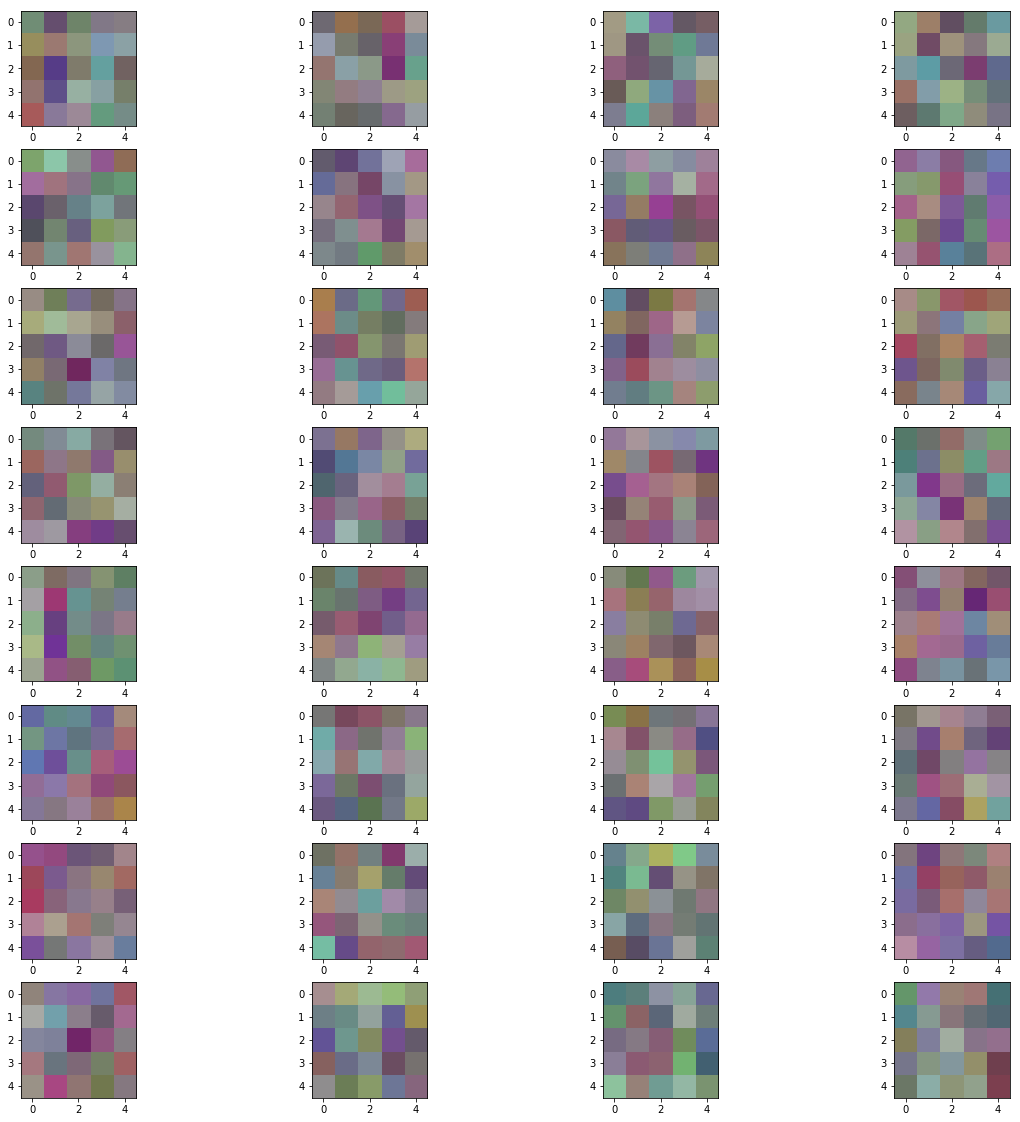

In [17]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(deprocess_image(weights[:,:,:,filter_index]))
    filter_index += 1

In [18]:
weights, biases = model3.layers[2].get_weights()

In [19]:
weights.shape

(5, 5, 32, 32)

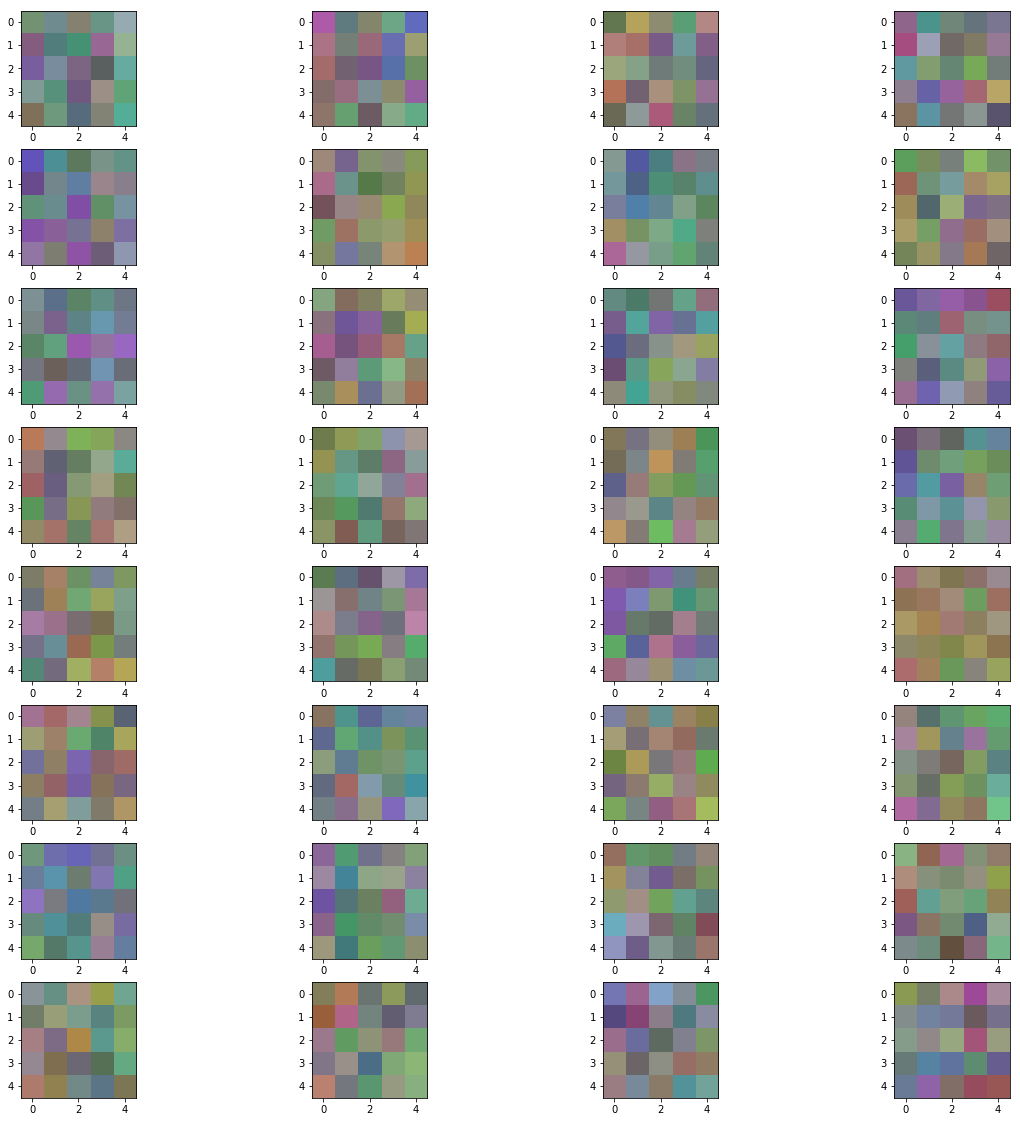

In [20]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(deprocess_image(weights[:,:,0:3,filter_index]))
    filter_index += 1

In [21]:
layer_outputs = [layer.output for layer in model3.layers[:12]] 
# Extracts the outputs of the top 12 layers

activation_model = models.Model(inputs=model3.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

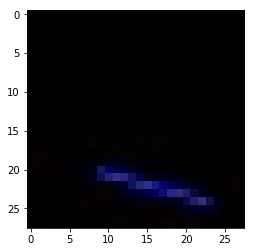

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
imgplot = plt.imshow(x_test[6].reshape(28,28,3))
plt.show()
print(y_test[6])

In [23]:
activations = activation_model.predict(x_test[6].reshape(1,28,28,3))
# Returns a list of five Numpy arrays: one array per layer activation

(1, 24, 24, 32)


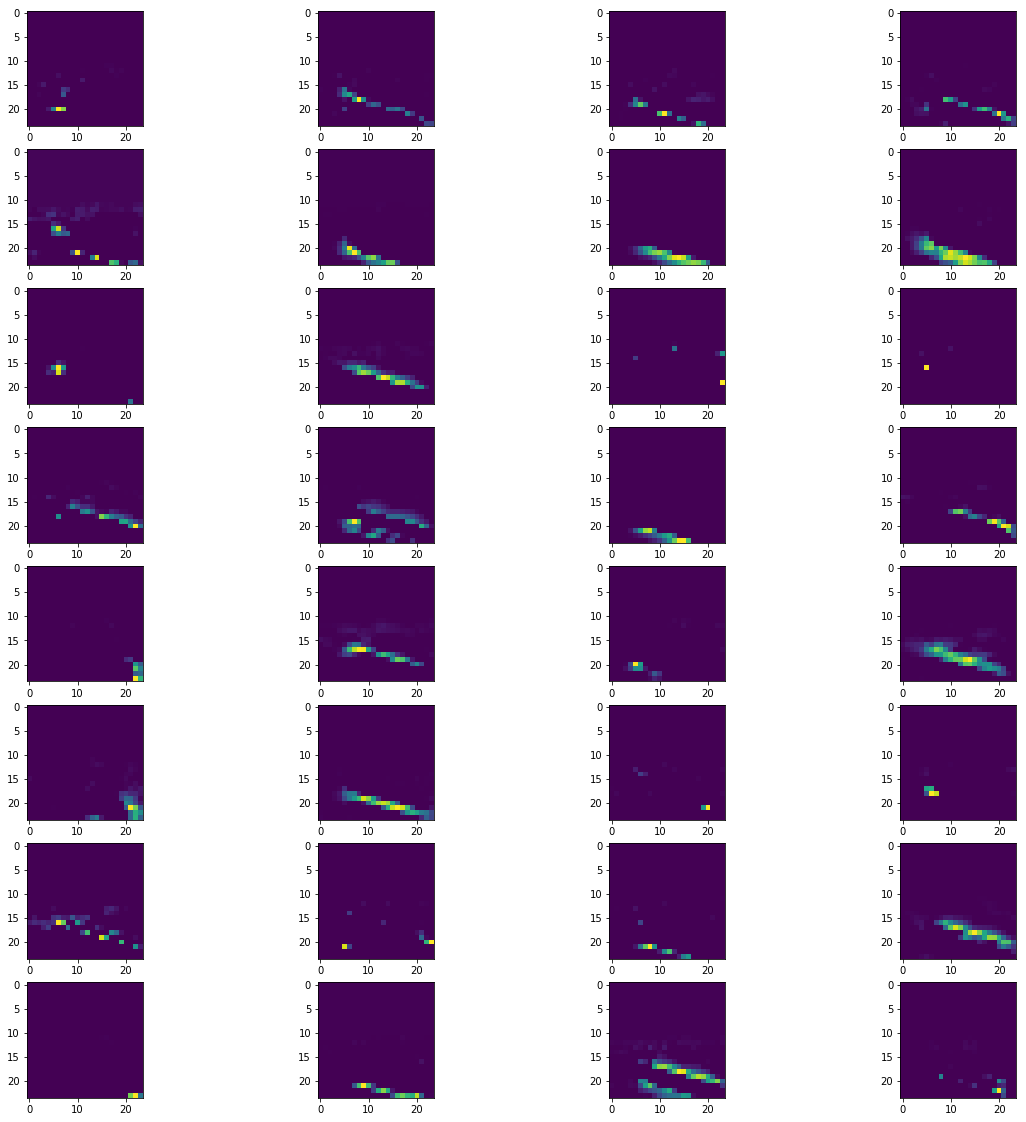

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

(1, 24, 24, 32)


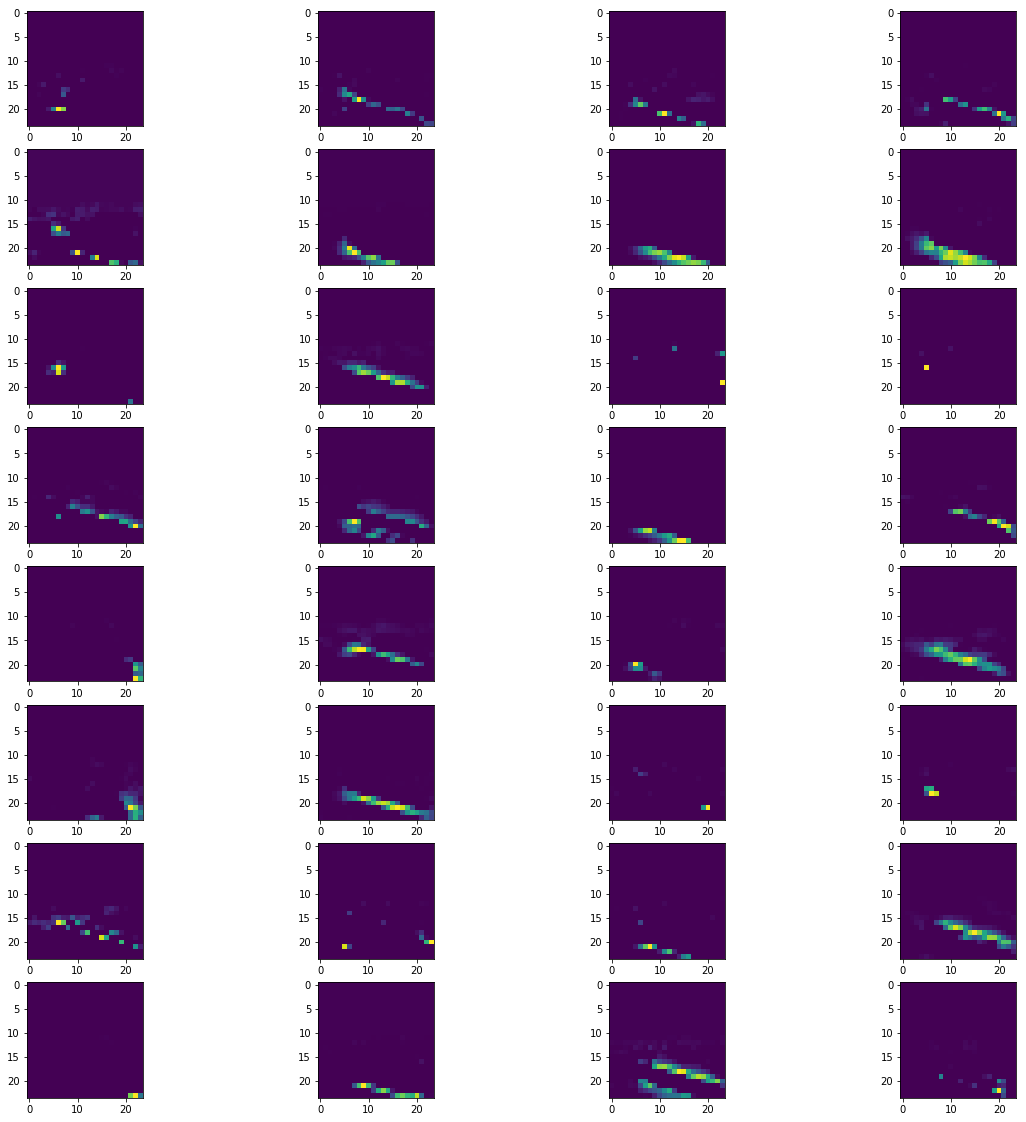

In [25]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index],)
    filter_index += 1

(1, 20, 20, 32)


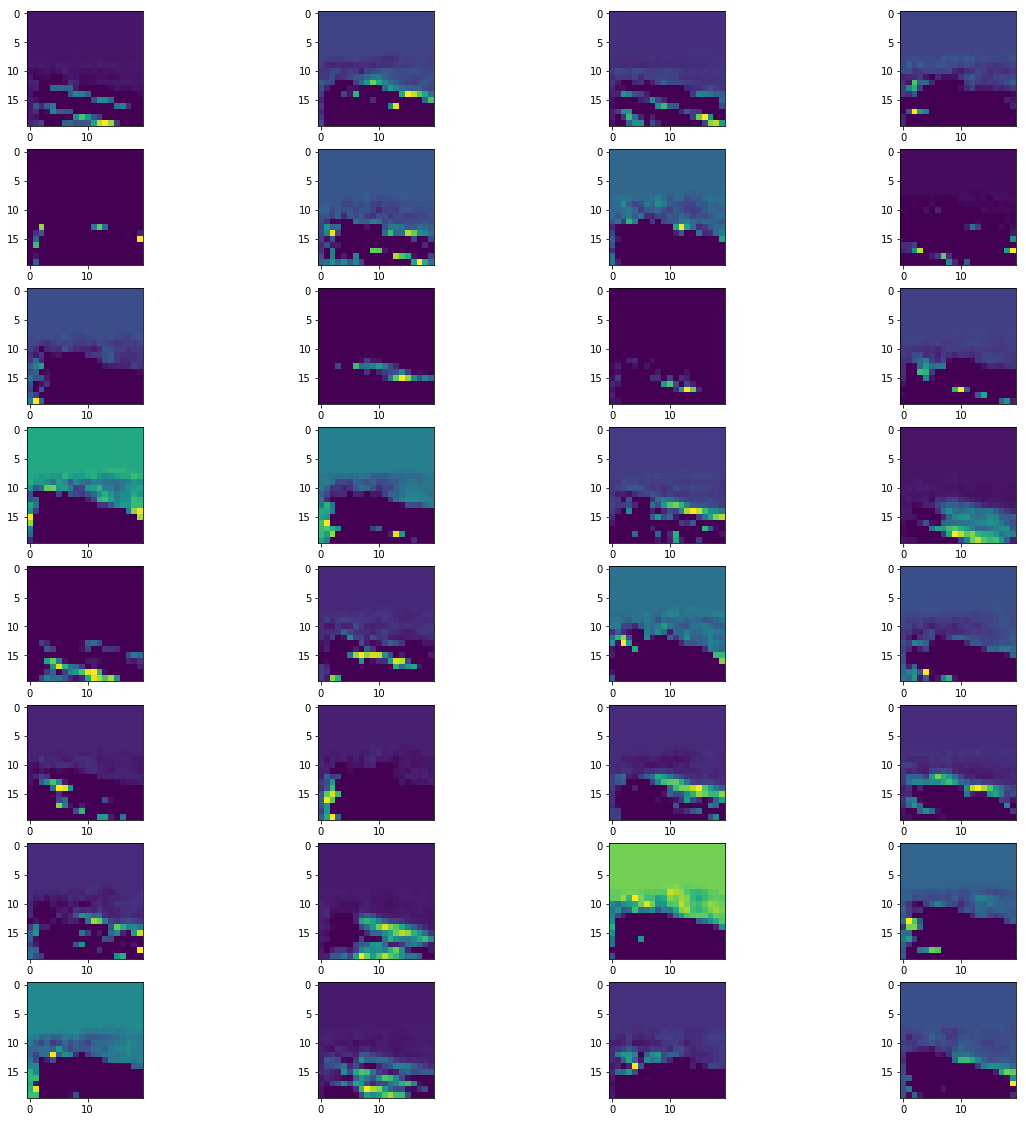

In [26]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [29]:
print(model3.output)
flower_output = model3.output[1]

Tensor("dense_1/Softmax:0", shape=(?, 96), dtype=float32)


In [ ]:
last_conv_layer = model3.get_layer('layer_conv2')
grads = K.gradients(flower_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model3.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

#2048 is the number of filters/channels in 'mixed10' layer
for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
print(heatmap.shape)
heatmap=heatmap.reshape((11,11))
plt.imshow(heatmap)